# Import

In [2]:
import pandas as pd
# import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Load the sentiment predictions

In [39]:
ge_openai_gpt35_headlines_df = pd.read_csv('../data/GE_OpenAI-GPT3.5_headlines.csv', dtype={'Sentiment': float, 'Stock_symbol': str, 'Url': str}, parse_dates=['Date']).drop(['Stock_symbol', 'Url'], axis=1).set_index(['Date']).rename(columns={"Sentiment": "GPT3.5"})
ge_finbert_headlines_df = pd.read_csv('../data/GE_ProsusAI_finBERT_headlines.csv', dtype={'Sentiment': float, 'Stock_symbol': str, 'Url': str}, parse_dates=['Date']).drop(['Stock_symbol', 'Url'], axis=1).set_index(['Date']).rename(columns={"Sentiment": "FinBERT"})
ge_llama2_13b_gguf_fullarticle_df = pd.read_csv('/code/data/GE_TheBloka_Llama-2-13b_Q4_K_M_gguf_fullarticles.csv', dtype={'Sentiment': float, 'Stock_symbol': str, 'Url': str}, parse_dates=['Date']).drop(['Stock_symbol', 'Url'], axis=1).set_index(['Date']).rename(columns={"Sentiment": "Llama2-13b-GGUF"})
ge_llama2_13b_gptq_fullarticle_df = pd.read_csv('/code/data/GE_TheBloke_Llama-2-13B-GPTQ_fullarticles.csv', dtype={'Sentiment': float, 'Stock_symbol': str, 'Url': str}, parse_dates=['Date']).drop(['Stock_symbol', 'Url'], axis=1).set_index(['Date']).rename(columns={"Sentiment": "Llama2-13b-GPTQ"})
ge_llama2_70b_gptq_fullarticle_df = pd.read_csv('/code/data/GE_TheBloke_Llama-2-70B-GPTQ_fullarticles.csv', dtype={'Sentiment': float, 'Stock_symbol': str, 'Url': str}, parse_dates=['Date']).drop(['Stock_symbol', 'Url'], axis=1).set_index(['Date']).rename(columns={"Sentiment": "Llama2-70b-GPTQ"})

ge_finbert_headlines_df

,FinBERT
Date,
2023-12-16 21:00:00+00:00,4.856880
2023-12-16 00:00:00+00:00,4.722641
2023-12-16 00:00:00+00:00,3.151579
2023-12-16 00:00:00+00:00,4.663424
2023-12-15 00:00:00+00:00,2.593138
...,...
2012-04-23 00:00:00+00:00,3.744149
2012-04-23 00:00:00+00:00,2.466803
2012-04-20 00:00:00+00:00,3.857823


# Check sentiment prediction table lenghs
The lenghts of the tables should be the same

In [40]:
# check whether they have the same length
print(f"""The length of the predictions are:
GPT3.5: \t\t{len(ge_openai_gpt35_headlines_df)}
FinBERT: \t\t{len(ge_finbert_headlines_df)}
Llama2-13b-gguf: \t{len(ge_llama2_13b_gguf_fullarticle_df)}
LLama2-13b-gptq: \t{len(ge_llama2_13b_gptq_fullarticle_df)}
Llama2-70b-gptq: \t{len(ge_llama2_70b_gptq_fullarticle_df)}
""")

The length of the predictions are:
GPT3.5: 		8680
FinBERT: 		8680
Llama2-13b-gguf: 	8680
LLama2-13b-gptq: 	8680
Llama2-70b-gptq: 	8680



# Merge the tables

In [41]:
# merge the datasets
merged_df = pd.concat([ge_openai_gpt35_headlines_df, ge_finbert_headlines_df, ge_llama2_13b_gguf_fullarticle_df, ge_llama2_13b_gptq_fullarticle_df, ge_llama2_70b_gptq_fullarticle_df], axis=1)
merged_df

,GPT3.5,FinBERT,Llama2-13b-GGUF,Llama2-13b-GPTQ,Llama2-70b-GPTQ
Date,,,,,
2023-12-16 21:00:00+00:00,4.0,4.856880,4.0,2.0,4.0
2023-12-16 00:00:00+00:00,5.0,4.722641,4.0,4.0,4.0
2023-12-16 00:00:00+00:00,3.0,3.151579,4.0,4.0,4.0
2023-12-16 00:00:00+00:00,4.0,4.663424,4.0,3.0,2.0
2023-12-15 00:00:00+00:00,3.0,2.593138,4.0,3.0,4.0
...,...,...,...,...,...
2012-04-23 00:00:00+00:00,5.0,3.744149,3.0,3.0,4.0
2012-04-23 00:00:00+00:00,3.0,2.466803,4.0,4.0,3.0
2012-04-20 00:00:00+00:00,4.0,3.857823,4.0,4.0,4.0


# Show correlation matrix

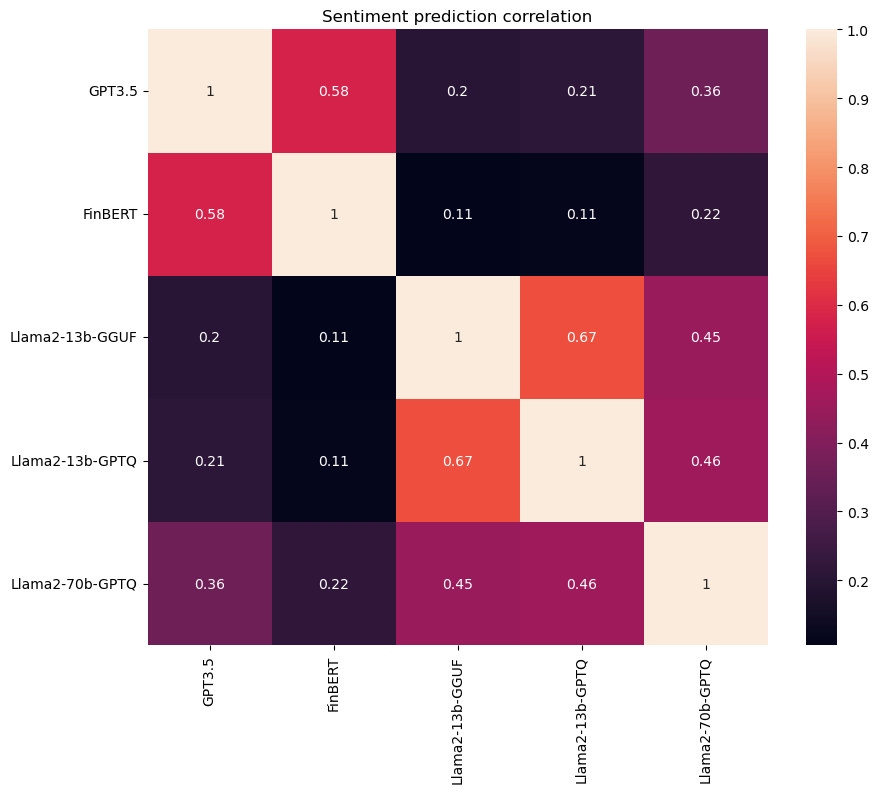

In [42]:
plt.figure(figsize=(10,8))
sns.heatmap(merged_df.corr(), annot=True)
plt.title('Sentiment prediction correlation')
plt.show()

# Show stock price and predicted sentiments

2012-04-20 00:00:00+00:00 2023-11-01 00:00:00+00:00


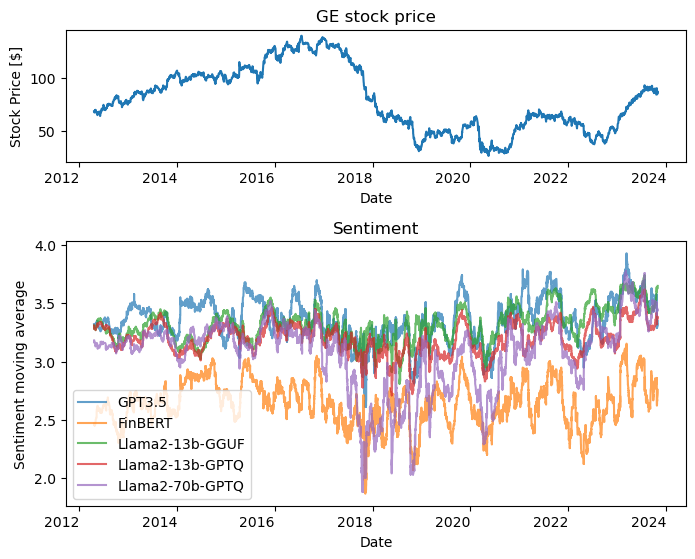

In [76]:
import yfinance as yf
import datetime 

moving_average = merged_df.rolling(100).mean().dropna()

start_date = list(moving_average.index.get_level_values('Date'))[-1].to_pydatetime().replace(hour=0, minute=0)
end_date = list(moving_average.index.get_level_values('Date'))[0].to_pydatetime().replace(hour=0, minute=0) + datetime.timedelta(days = 1)
print(start_date, end_date)

stock_price = yf.Ticker('GE').history(start=start_date, end=end_date, period="1day", auto_adjust=False, actions=False)[['Adj Close']]

fig, ax = plt.subplots(2, 1, figsize=(8, 7), gridspec_kw={'height_ratios': [1, 2]})
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.4)


stock_price['Adj Close'].plot(ax=ax[0])
ax[0].set_ylabel('Stock Price [$]', fontsize=10)
ax[0].set_title('GE stock price')
ax[0].tick_params(axis='x', labelrotation=0)

moving_average.plot(ax=ax[1], alpha=0.7)
ax[1].set_ylabel('Sentiment moving average', fontsize=10)
ax[1].set_title('Sentiment')
ax[1].tick_params(axis='x', labelrotation=0)
# ax[1].set_xticks([])

plt.show()